In [2]:
import pandas as pd

new_columns = ['ID', 'Time', 'Element', 'Value', 'M-Flag', 'Q-Flag', 'S-Flag', 'OBS-Time']

ghcn_2023 = pd.read_csv('https://ghcn.blob.core.windows.net/ghcn/csv/daily/by_year/2023.csv', names = new_columns)

ghcn_2023

,ID,Time,Element,Value,M-Flag,Q-Flag,S-Flag,OBS-Time
0,AE000041196,20230101,TMAX,252,NaN,NaN,S,NaN
1,AE000041196,20230101,TMIN,149,NaN,NaN,S,NaN
2,AE000041196,20230101,PRCP,0,D,NaN,S,NaN
3,AE000041196,20230101,TAVG,207,H,NaN,S,NaN
4,AEM00041194,20230101,TMAX,255,NaN,NaN,S,NaN
...,...,...,...,...,...,...,...,...
37473983,ZI000067775,20231231,TMIN,176,NaN,NaN,S,NaN
37473984,ZI000067775,20231231,TAVG,216,H,NaN,S,NaN
37473985,ZI000067975,20231231,TMIN,169,NaN,NaN,S,NaN
37473986,ZI000067975,20231231,PRCP,10,NaN,NaN,S,NaN


In [7]:
ghcn_2023.drop(ghcn_2023[ghcn_2023['Q-Flag'].notnull() == True].index, inplace=True)

In [8]:
merge_df = ghcn_2023[(ghcn_2023.ID.str.startswith('US')) & (ghcn_2023.Element.isin(["PRCP", "TMAX", "TMIN", "TAVG"]))].reset_index(drop = True)

In [10]:
pivot_df = merge_df.pivot_table(index = ['Time', 'ID'], columns = 'Element', values = 'Value').reset_index()
pivot_df

Element,Time,ID,PRCP,TAVG,TMAX,TMIN
0,20230101,US10adam002,0.0,NaN,NaN,NaN
1,20230101,US10adam008,0.0,NaN,NaN,NaN
2,20230101,US10adam022,0.0,NaN,NaN,NaN
3,20230101,US10adam032,0.0,NaN,NaN,NaN
4,20230101,US10adam036,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
8352548,20231231,USW00096404,0.0,NaN,-183.0,-302.0
8352549,20231231,USW00096406,3.0,NaN,-213.0,-364.0
8352550,20231231,USW00096407,0.0,NaN,-104.0,-282.0
8352551,20231231,USW00096408,0.0,NaN,-58.0,-178.0


In [16]:
pivot_df = pivot_df.rename_axis(None, axis=1)

pivot_df

,Time,ID,PRCP,TAVG,TMAX,TMIN
0,20230101,US10adam002,0.0,NaN,NaN,NaN
1,20230101,US10adam008,0.0,NaN,NaN,NaN
2,20230101,US10adam022,0.0,NaN,NaN,NaN
3,20230101,US10adam032,0.0,NaN,NaN,NaN
4,20230101,US10adam036,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
8352548,20231231,USW00096404,0.0,NaN,-183.0,-302.0
8352549,20231231,USW00096406,3.0,NaN,-213.0,-364.0
8352550,20231231,USW00096407,0.0,NaN,-104.0,-282.0
8352551,20231231,USW00096408,0.0,NaN,-58.0,-178.0


In [27]:
df1 = merge_df.pivot_table(index = 'Time', columns = 'Element', values = 'Value').reset_index().rename_axis(None, axis=1)
df1.Time = pd.to_datetime(df1.Time, format='%Y%m%d')
df1.set_index('Time', inplace = True)

In [ ]:
df1.plot()

In [22]:
import pandas as pd

new_columns = ['ID', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'STATE', 'NAME', 'GSN FLAG', 'HCN/CRN FLAG', 'WMO ID']

URL = 'https://www.ncei.noaa.gov/oa/global-historical-climatology-network/hourly/doc/ghcnh-station-list.csv'

df = pd.read_csv(URL, names = new_columns)

df

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
0,ACL000BARA9,17.5910,-61.8210,5.0,TX,BARBUDA,,,
1,ACW00011647,17.1333,-61.7833,19.2,,ST JOHNS,,,
2,AFW00000472,43.0667,74.4667,637.0,TX,KYRGYZSTAN US MIL BISHKEK,,,
3,AQC00914594,-14.3333,-170.7667,42.4,AS,MALAELOA,,,
4,AQC00914902,-14.2728,-170.6922,80.8,AS,VAIPITO,,,
...,...,...,...,...,...,...,...,...,...
6097,VQL000SRBV3,17.7833,-64.7667,7.0,MI,SALT RIVER BAY / ST CROIX,,,
6098,VQW00011624,17.6997,-64.8125,14.0,VI,HENRY E ROHLSEN AP,,,78551
6099,VQW00011640,18.3364,-64.9800,0.0,VI,CYRIL E KING AP,,,78543
6100,WQL000WAKP8,19.2800,166.6200,5.0,VA,WAKE ISLAND,,,


In [23]:
df[df.ID.str.startswith('USI')]

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
2157,USI0000K00U,45.7444,-107.6604,922.0,MT,BIG HORN COUNTY ARPT / HARDIN,,,
2158,USI0000K01M,34.4917,-88.2011,176.2,MS,TISHOMINGO CO,,,
2159,USI0000K06C,41.9893,-88.1012,244.1,IL,SCHAUMBURG RGNL,,,
2160,USI0000K0A0,32.9895,-106.9695,1401.0,NM,SPACEPORT AMERICA,,,
2161,USI0000K0R0,31.2970,-89.8128,80.8,MS,COLUMBIA MARION CO,,,
...,...,...,...,...,...,...,...,...,...
2591,USI0000PHHN,20.7956,-156.0144,23.8,HI,HANA,,,
2592,USI0000PHMU,20.0013,-155.6681,814.1,HI,WAIMEA KOHALA,,,
2593,USI0000PHUP,20.2653,-155.8600,29.3,HI,UPOLU,,,
2594,USI0000PPIT,60.9000,-162.4333,3.0,AK,NUNAPITCHUK,,,


In [42]:
pd.set_option('display.max_columns', None)
year = 2023
ID = 'USW00094997'
URL = f'https://www.ncei.noaa.gov/oa/global-historical-climatology-network/hourly/access/by-year/{year}/psv/GHCNh_{ID}_{year}.psv'

df = pd.read_csv('https://www.ncei.noaa.gov/oa/global-historical-climatology-network/hourly/access/by-station/GHCNh_ACL000BARA9_por.psv', sep = '|')

df

C:\Users\slin\AppData\Local\Temp\ipykernel_8220\140080969.py:6: DtypeWarning: Columns (35,37,39,41,43,45,49,51,142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://www.ncei.noaa.gov/oa/global-historical-climatology-network/hourly/access/by-station/GHCNh_ACL000BARA9_por.psv', sep = '|')


,Station_ID,Station_name,Year,Month,Day,Hour,Minute,Latitude,Longitude,Elevation,temperature,temperature_Measurement_Code,temperature_Quality_Code,temperature_Report_Type,temperature_Source_Code,temperature_Source_Station_ID,dew_point_temperature,dew_point_temperature_Measurement_Code,dew_point_temperature_Quality_Code,dew_point_temperature_Report_Type,dew_point_temperature_Source_Code,dew_point_temperature_Source_Station_ID,station_level_pressure,station_level_pressure_Measurement_Code,station_level_pressure_Quality_Code,station_level_pressure_Report_Type,station_level_pressure_Source_Code,station_level_pressure_Source_Station_ID,sea_level_pressure,sea_level_pressure_Measurement_Code,sea_level_pressure_Quality_Code,sea_level_pressure_Report_Type,sea_level_pressure_Source_Code,sea_level_pressure_Source_Station_ID,wind_direction,wind_direction_Measurement_Code,wind_direction_Quality_Code,wind_direction_Report_Type,wind_direction_Source_Code,wind_direction_Source_Station_ID,wind_speed,wind_speed_Measurement_Code,wind_speed_Quality_Code,wind_speed_Report_Type,wind_speed_Source_Code,wind_speed_Source_Station_ID,wind_gust,wind_gust_Measurement_Code,wind_gust_Quality_Code,wind_gust_Report_Type,wind_gust_Source_Code,wind_gust_Source_Station_ID,precipitation,precipitation_Measurement_Code,precipitation_Quality_Code,precipitation_Report_Type,precipitation_Source_Code,precipitation_Source_Station_ID,relative_humidity,relative_humidity_Measurement_Code,relative_humidity_Quality_Code,relative_humidity_Report_Type,relative_humidity_Source_Code,relative_humidity_Source_Station_ID,wet_bulb_temperature,wet_bulb_temperature_Measurement_Code,wet_bulb_temperature_Quality_Code,wet_bulb_temperature_Report_Type,wet_bulb_temperature_Source_Code,wet_bulb_temperature_Source_Station_ID,pres_wx_MW1,pres_wx_MW1_Measurement_Code,pres_wx_MW1_Quality_Code,pres_wx_MW1_Report_Type,pres_wx_MW1_Source_Code,pres_wx_MW1_Source_Station_ID,pres_wx_MW2,pres_wx_MW2_Measurement_Code,pres_wx_MW2_Quality_Code,pres_wx_MW2_Report_Type,pres_wx_MW2_Source_Code,pres_wx_MW2_Source_Station_ID,pres_wx_MW3,pres_wx_MW3_Measurement_Code,pres_wx_MW3_Quality_Code,pres_wx_MW3_Report_Type,pres_wx_MW3_Source_Code,pres_wx_MW3_Source_Station_ID,pres_wx_AU1,pres_wx_AU1_Measurement_Code,pres_wx_AU1_Quality_Code,pres_wx_AU1_Report_Type,pres_wx_AU1_Source_Code,pres_wx_AU1_Source_Station_ID,pres_wx_AU2,pres_wx_AU2_Measurement_Code,pres_wx_AU2_Quality_Code,pres_wx_AU2_Report_Type,pres_wx_AU2_Source_Code,pres_wx_AU2_Source_Station_ID,pres_wx_AU3,pres_wx_AU3_Measurement_Code,pres_wx_AU3_Quality_Code,pres_wx_AU3_Report_Type,pres_wx_AU3_Source_Code,pres_wx_AU3_Source_Station_ID,pres_wx_AW1,pres_wx_AW1_Measurement_Code,pres_wx_AW1_Quality_Code,pres_wx_AW1_Report_Type,pres_wx_AW1_Source_Code,pres_wx_AW1_Source_Station_ID,pres_wx_AW2,pres_wx_AW2_Measurement_Code,pres_wx_AW2_Quality_Code,pres_wx_AW2_Report_Type,pres_wx_AW2_Source_Code,pres_wx_AW2_Source_Station_ID,pres_wx_AW3,pres_wx_AW3_Measurement_Code,pres_wx_AW3_Quality_Code,pres_wx_AW3_Report_Type,pres_wx_AW3_Source_Code,pres_wx_AW3_Source_Station_ID,snow_depth,snow_depth_Measurement_Code,snow_depth_Quality_Code,snow_depth_Report_Type,snow_depth_Source_Code,snow_depth_Source_Station_ID,visibility,visibility_Measurement_Code,visibility_Quality_Code,visibility_Report_Type,visibility_Source_Code,visibility_Source_Station_ID,altimeter,altimeter_Measurement_Code,altimeter_Quality_Code,altimeter_Report_Type,altimeter_Source_Code,altimeter_Source_Station_ID,pressure_3hr_change,pressure_3hr_change_Measurement_Code,pressure_3hr_change_Quality_Code,pressure_3hr_change_Report_Type,pressure_3hr_change_Source_Code,pressure_3hr_change_Source_Station_ID,sky_cover_1,sky_cover_1_Measurement_Code,sky_cover_1_Quality_Code,sky_cover_1_Report_Type,sky_cover_1_Source_Code,sky_cover_1_Source_Station_ID,sky_cover_baseht_1,sky_cover_baseht_1_Measurement_Code,sky_cover_baseht_1_Quality_Code,sky_cover_baseht_1_Report_Type,sky_cover_baseht_1_Source_Code,sky_cover_baseht_1_S

<Axes: xlabel='Hour'>

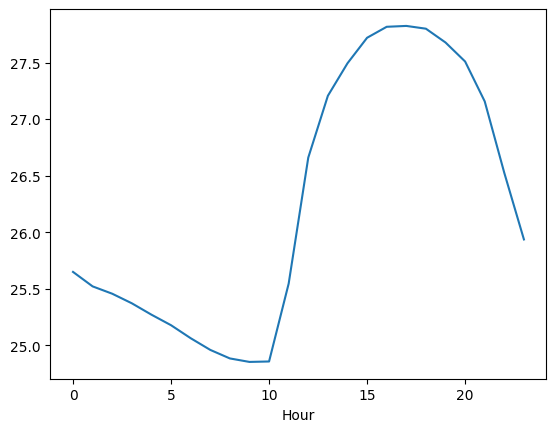

In [44]:
df.groupby('Hour')['temperature'].mean().plot()

In [2]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=True)

In [4]:
parameters = ['10u', '10v','2t']
filename = 'medium-2t-wind.grib'
filename

'medium-2t-wind.grib'

In [5]:
client.retrieve(
    date=0,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="sfc",
    param=parameters,
    target=filename
)

set() ['fc']
set() ['12']
set() ['100u', '100v', '10u', '10v', '2d', '2t', 'asn', 'cape', 'd', 'gh', 'lsm', 'msl', 'q', 'r', 'ro', 'skt', 'sp', 'ssr', 'ssrd', 'st', 'stl2', 'stl3', 'stl4', 'str', 'strd', 'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 'tcwv', 'tp', 'ttr', 'u', 'v', 'vo', 'w']
set() ['pl', 'sfc']


20240703000000-12h-oper-fc.grib2:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

In [6]:
data = ecdata.read(filename)
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20240703,0,12,None,165,od,oper,fc,0001
10v,heightAboveGround,10,20240703,0,12,None,166,od,oper,fc,0001
2t,heightAboveGround,2,20240703,0,12,None,167,od,oper,fc,0001


In [7]:
data.describe('2t')

shortName,2t
name,2 metre temperature
paramId,167
units,K
typeOfLevel,heightAboveGround
level,2
date,20240703
time,0
step,12
number,None
class,od


In [8]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,2t,heightAboveGround,2,20240703,0,12,fc,None,regular_ll
1,ecmf,10u,heightAboveGround,10,20240703,0,12,fc,None,regular_ll
2,ecmf,10v,heightAboveGround,10,20240703,0,12,fc,None,regular_ll


In [9]:
t2m = data.select(shortName= "2t")
u = data.select(shortName= "10u")
v = data.select(shortName= "10v")

t2m.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
2t,heightAboveGround,2,20240703,0,12,None,167,od,oper,fc,0001


In [10]:
t2m -= 273.15

In [12]:
fig = GeoMap(area_name='europe')

fig.contour_shaded(t2m, style="temperature_rainbow_3")
fig.arrows(u=u, v=v, wind_style="arrows", density=2, colour='black')

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["2m temperature and 10m wind",
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=2t'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=2t' />, STEP: <grib_info key='step' where='shortName=2t'/>"])

fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')

fig.show()

MagicsError: Coordinate outside allowed range

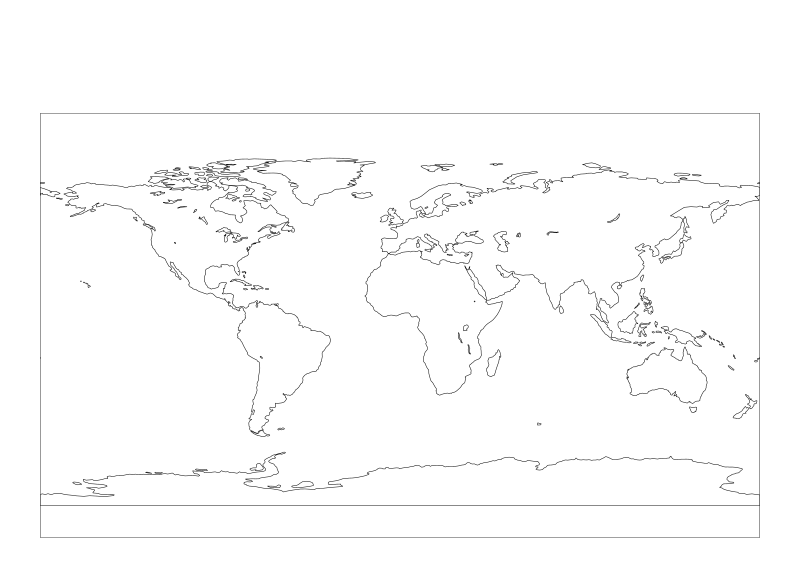

In [13]:
geomap = GeoMap()
geomap.coastlines()
geomap.show()

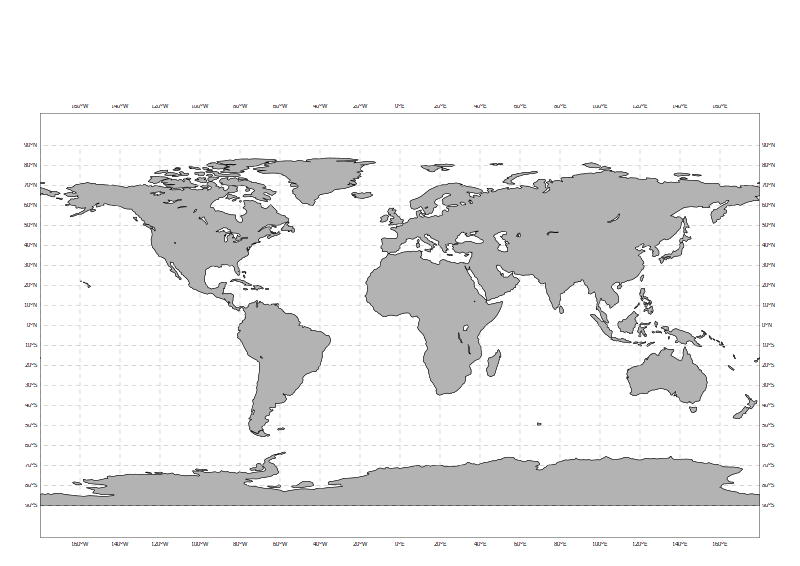

In [14]:
geomap.coastlines(land_colour="grey")
geomap.gridlines(line_colour="grey", line_style="dash")

geomap.show()

Magics-ERROR: ERROR: unable to open file 'mslp.grib': No such file or directory


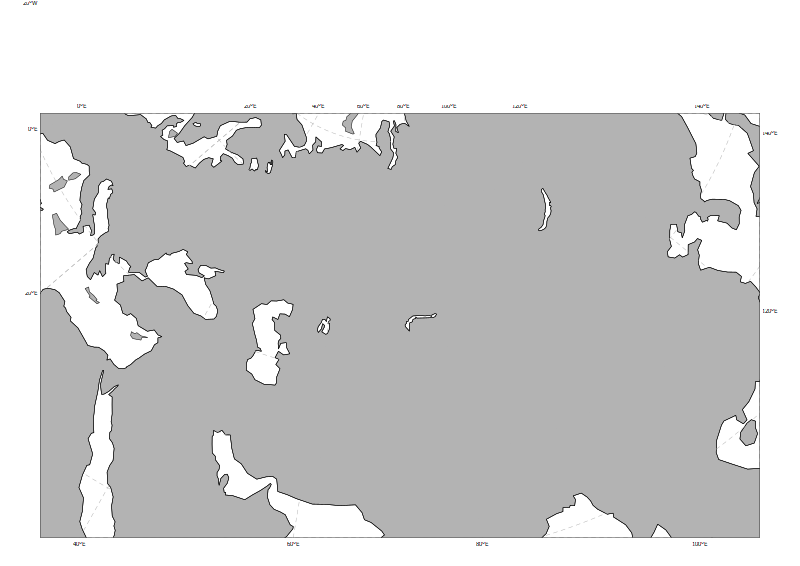

In [21]:
geomap = GeoMap(area_name="western_asia")

geomap.coastlines(land_colour="grey")
geomap.contour_lines("mslp.grib")
geomap.gridlines(line_colour="grey", line_style="dash")

geomap.show()

In [22]:
api_url = "https://charts.ecmwf.int/opencharts-api/v1/products/"

import requests

result = requests.get(api_url)

all_data = result.json()

all_data[:5]

[{'api-documentation': 'https://charts.ecmwf.int/opencharts-api/v1/swagger-ui/?product=medium-mslp-wind850&package=opencharts',
  'schema-url': 'https://charts.ecmwf.int/opencharts-api/v1/schema/?product=medium-mslp-wind850&package=openchart',
  'name': 'medium-mslp-wind850',
  'product-url': 'https://charts.ecmwf.int/opencharts-api/v1/products/medium-mslp-wind850/',
  'title': 'Mean sea level pressure and 850 hPa wind speed'},
 {'api-documentation': 'https://charts.ecmwf.int/opencharts-api/v1/swagger-ui/?product=medium-z500-t850&package=opencharts',
  'schema-url': 'https://charts.ecmwf.int/opencharts-api/v1/schema/?product=medium-z500-t850&package=openchart',
  'name': 'medium-z500-t850',
  'product-url': 'https://charts.ecmwf.int/opencharts-api/v1/products/medium-z500-t850/',
  'title': '500 hPa geopotential height and 850 hPa\xa0temperature'},
 {'api-documentation': 'https://charts.ecmwf.int/opencharts-api/v1/swagger-ui/?product=medium-2mt-wind30&package=opencharts',
  'schema-url'

In [26]:
product = 'medium-2mt-wind30'
api_url = "https://charts.ecmwf.int/opencharts-api/v1/"

get = '{}products/{}/'.format(api_url, product)
    
result = requests.get(get)
    
data = result.json()

data

{'meta': {'terms-and-conditions': {'href': 'https://apps.ecmwf.int/datasets/licences/general/'},
  'licence': 'CC-BY-4.0',
  'copyright': '©2023 European Centre for Medium-Range Weather Forecasts'},
 'data': {'link': {'href': 'https://charts.ecmwf.int/content/20240703192849-59bd569e7ec49dd1ff27fcd994e391b19974c96d.png',
   'type': 'image/png'},
  'attributes': {'description': 'Base time: Wed 03 Jul 2024 12 UTC Valid time: Wed 03 Jul 2024 12 UTC (+0h) Area : Europe',
   'name': 'medium-2mt-wind30',
   'title': '2 m temperature and 30 m wind'},
  'type': 'graphical_product'},
 'tracker': 'tracker-bcebc4036396405eb03c647f5bc7a511',
 'template': 'ecmwf',
 'uid': ''}

In [28]:
data["data"]["link"]["href"]

'https://charts.ecmwf.int/content/20240703192849-59bd569e7ec49dd1ff27fcd994e391b19974c96d.png'

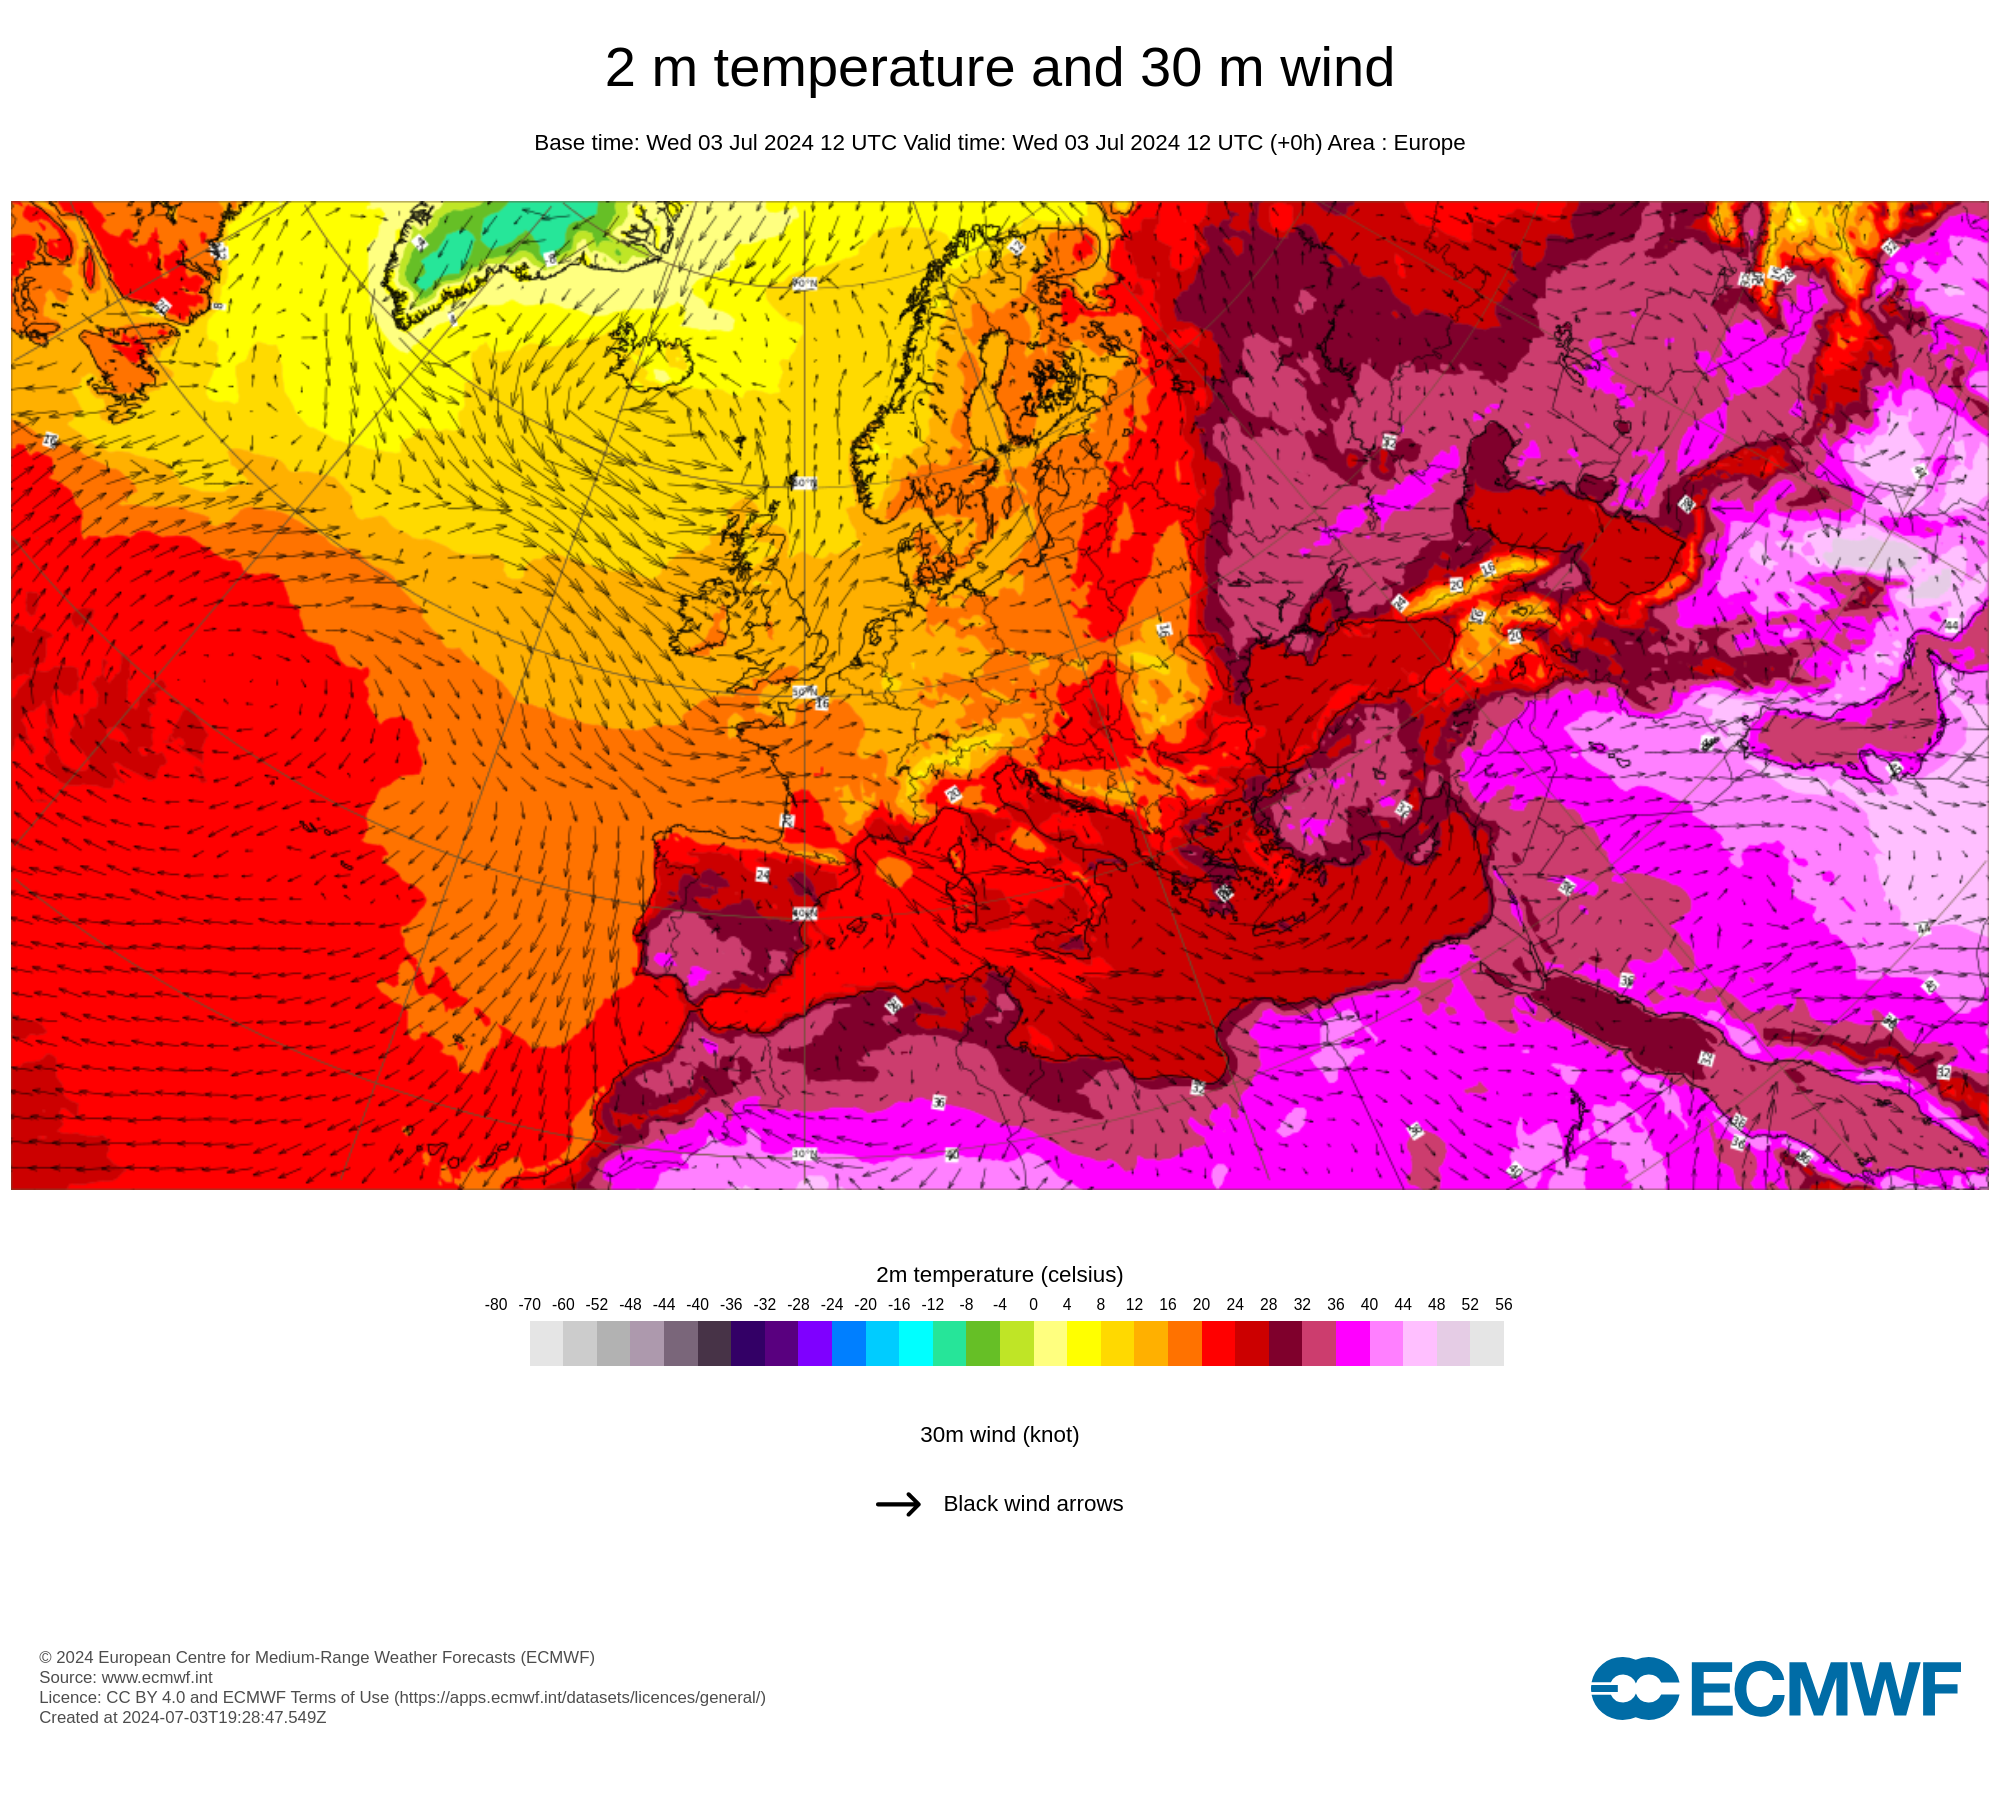

In [29]:
from IPython import display
display.Image(data["data"]["link"]["href"])

In [30]:
import pandas as pd 

date_test = pd.date_range("2000-01-01", periods=365)

date_test

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-21', '2000-12-22', '2000-12-23', '2000-12-24',
               '2000-12-25', '2000-12-26', '2000-12-27', '2000-12-28',
               '2000-12-29', '2000-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [35]:
date_test[:-1]

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-20', '2000-12-21', '2000-12-22', '2000-12-23',
               '2000-12-24', '2000-12-25', '2000-12-26', '2000-12-27',
               '2000-12-28', '2000-12-29'],
              dtype='datetime64[ns]', length=364, freq='D')

In [37]:
from datetime import datetime

now = datetime.now()

adjust_time = now.strftime("%m/%d/%Y %H:%M:%S")

adjust_time

'07/08/2024 13:55:53'